In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, make_scorer

from deepchecks.checks import ClassPerformanceImbalanceCheck
from deepchecks.base import Dataset


In [2]:
iris = load_iris(as_frame=True)
train, test = train_test_split(iris.frame, test_size=0.33, random_state=42)

train_ds = Dataset(train, label="target")
test_ds = Dataset(test, label="target")

clf = AdaBoostClassifier().fit(train_ds.features_columns(), train_ds.label_col())

Class Performance Imbalance

Visualize class imbalance by displaying the difference between class score values.

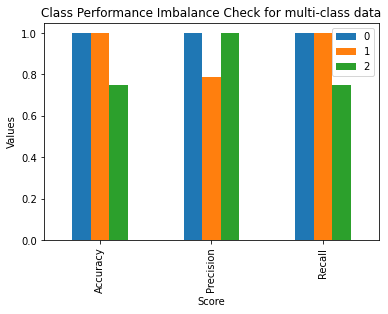

In [3]:
check = ClassPerformanceImbalanceCheck()
check.run(test_ds, clf)

## Initializing check instance with custom metrics

Class Performance Imbalance

Visualize class imbalance by displaying the difference between class score values.

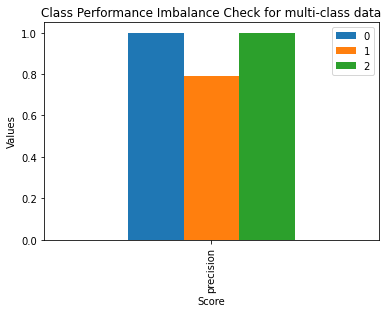

In [4]:
scorers = {
    "precision": make_scorer(precision_score, average=None, zero_division=0),
}

check = ClassPerformanceImbalanceCheck(alternative_scorers=scorers)
check.run(test_ds, clf)